# Module 3 - Tilbakekoblingsmekanismer (feat ToboxModel)

Like in module 2, we first need to import the librairies and the toboks function calculate_temp_anomalies

In [1]:
# Lese inn relavente python pakker vi ska bruke
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook inkluder denne linjen om du vil åpne i Jupyter Notebook og vil lage interaktive plott

from toboks import calculate_temp_anomalies # henter funksjonen som beregner temperaturanomalier basert på toboksmodellen

We also save the data stored in the "historical.csv" file into a DataFrame (df). This DataFrame contains the radiative forcing associated to changes in greenhouse gases, solar radiations, volcanic activity, agricultur and aerosols.

In [2]:
# les inn historisk data fra filen 'historical.csv'
df=pd.read_csv('historical.csv',index_col = 0,sep=',',encoding = "utf-8")

print('Radiative forcing in W/m2 \n \n', df)

Radiative forcing in W/m2 
 
         drivhusgasser  solinnstråling  vulkanisme  arealbruk  aerosoler
År                                                                     
1751.0         -0.019          -0.014       0.000      0.000     -0.002
1752.0         -0.018          -0.029       0.000     -0.001     -0.004
1753.0         -0.017          -0.033       0.000     -0.001     -0.005
1754.0         -0.017          -0.043       0.000     -0.002     -0.007
1755.0         -0.016          -0.054      -0.664     -0.002     -0.009
...               ...             ...         ...        ...        ...
2007.0          2.697          -0.017      -0.100     -0.150     -0.907
2008.0          2.728          -0.025      -0.100     -0.150     -0.904
2009.0          2.761          -0.027      -0.125     -0.150     -0.902
2010.0          2.794           0.001      -0.100     -0.150     -0.900
2011.0          2.831           0.030      -0.125     -0.150     -0.900

[261 rows x 5 columns]


## Control run 

Below we compute the temperature change resulting from all the listed radiative forcings: greenhouse gases, solar activity, volcanic activity, agricultur, and aerosols. For the other parameters, we use the same values than in module 2 (ie, a mean of the values used by validated earth system models). We'll call this first experiment our "control run". The temperature change is then saved in the DataFrame under the index "control". By saving later experiment the same way, it will be easy to compare them later.

To create a new experiment, copy and paste the cell below. Change the parameters that need to be changed, and remember to change the index "control".

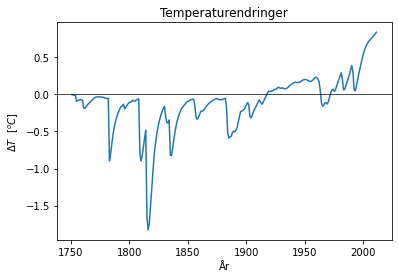

In [3]:
#/CONTROL//////////////////////////////////////////////////////////////////////////////////////////////////////////////
                                                                                                                    #//
# Forcing switches [n=1 off=0]                                                                                      #//
switch_ghg=1     # Greenhouse gas forcing on=1 off=0                                                                #//
switch_solar=1   # Solar forcing on=1 off=0                                                                         #//
switch_volc=1   # Volcanic forcing on=1 off=0                                                                      #//
switch_land=1    # Landuse forcing on=1 off=0                                                                       #//
switch_aero=1    # Pollution particle forcing on=1 off=0                                                            #//
                                                                                                                    #//
total_forcing = (switch_ghg*df['drivhusgasser']+switch_solar*df['solinnstråling']+switch_volc*df['vulkanisme']    
                +switch_land*df['arealbruk']+switch_aero*df['aerosoler'])                                           #//
                                                                                                                    #//
# parameters                                                                                                        #//
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       #//
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  #//
lambda_water=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   #//
lambda_cloud=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                        #//
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]                                #//
lambda_other=0.0       # Other feedbacks [Wm-2K-1]                                                                  #//
                                                                                                                    #//
lambda_sum=sum([lambda_planck,                                                                                      #//
    lambda_lapse,                                                                                                   #//
    lambda_water,                                                                                                   #//
    lambda_cloud,                                                                                                   #//
    lambda_albedo,                                                                                                  #//
    lambda_other])                                                                                                  #//
                                                                                                                    #//
# Deep ocean heat uptake efficency [Wm-2K-1]                                                                        #//
# CMIP3 values                                                                                                      #//
gamma=-0.69  # best guesses [-1 to -0.5]                                                                            #//
                                                                                                                    #//
# konverter dataframe til data-array                                                                                #//
radiative_forcing = total_forcing.to_numpy()                                                                        #//     
                                                                                                                    #//
# kaller opp funksjonen som regner ut temperaturendringene                                                          #//
df['control'], To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)                                  #//
                                                                                                                    #//
df['control'].plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer")                                       #//
plt.axhline(y=0, linewidth=0.7, color="black")                                                                      #//
                                                                                                                    #//
# deleting variables that will be re-used. Not necessary but it can help to avoid mistakes                          #//
del switch_ghg, switch_solar, switch_volc, switch_land, switch_aero                                                 #//
del total_forcing                                                                                                   #//
del lambda_planck, lambda_lapse, lambda_water, lambda_cloud, lambda_albedo, lambda_other, lambda_sum, gamma         #//
                                                                                                                    #//
# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

With no suprise (since we used the same parameters), we obtain the same temperature change than in modul2. As in modul2, we can evaluate the temperature anomalies with respect to the reference time period 1850-1900 and select the temperature change at a specific year.

<u>Reminder:</u> 

You can select a time period year1:year2 in a DataFrame by typing **DataFrameName['variable_name'].loc[year1:year2]**

You can compute the mean of the variable for that time period by doing **DataFrameName['variable_name'].loc[year1:year2].mean**

**NewObject = DataFrameName['VariableName']+some operations** will create a new DataFrame 

while  **DataFrameName['VariableName2']=DataFrameName['VariableName']+some  operations** adds one variable/column (with index VariableName2) to the preexisting DataFrame .

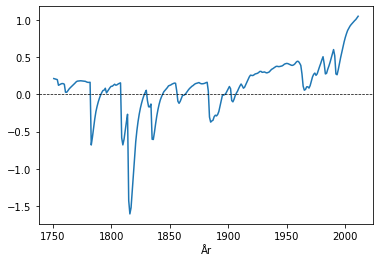

In [4]:
# the temperature anomalies with respect to one time period is done below in one line:
Tanom =  df['control']- df['control'].loc[1850:1900].mean() # temp. anomaly
# make plot
Tanom.plot()
plt.axhline(y=0, linewidth=0.7, color="black", ls='--')

In [5]:
# selecting the temperature change at one specific year
# below we use the temperature anomalies with respect to 1850-1900
year = 2011
Tloc = Tanom.loc[year]
print('Temperature change at year ', year, ':', "%.2f" %(Tloc),'°C')

Temperature change at year  2011 : 1.05 °C


## Questions

### 1 - preliminary questions: 

* According to the simple expression found for the Earth temperature in modul1 $T_{e} =  \left( \frac{(1-\alpha)\Omega}{4\sigma(1-\frac{\epsilon}{2})} \right) ^{\frac{1}{4}} $, the temperature of the Earth can increase if 1- its albedo decrease ($\alpha$) 2- the solar constant increases ($\Omega$) or 3- the absorption/emission of longwave radations in the atmosphere increases. Could you guess on which of these parameters greenhouse gases, solar activity, volcanic activity, agricultur, and aerosols, act?

* For simplification, these parameters are reduced to "radiative forcings". A positive radiative forcing induces an increase in temperature, while a negative one induces a cooling. The higher the absolute value of the radiative forcing is, the higher the temperature changes. Using the values of the radiative forcings (given for the perid 1750 to 2013), compare the relative effect of greenhouse gases, solar activity, volcanic activity, agricultur, and aerosols on the Earth energy balance. You can look at the DataFrame to look at the order of magnitude of the radiative forcing (remember that you can easily plot these variables), or print the maximum/minimum for each forcing. 

### 2 - Create two experiments:

* Run#2:'NoHumanActivity', same as the control, but without the forcings due to human activity (greenhouse gas forcing, land-use and aerosols)

* Run#3: 'NoVolcanoes', same as the control, but without the forcing due to volcanoes

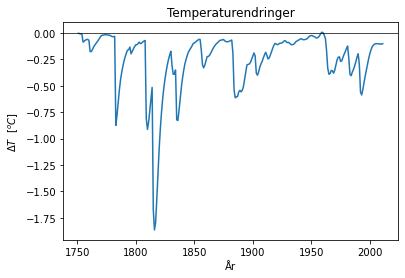

In [6]:
#/NoHumanActivity//////////////////////////////////////////////////////////////////////////////////////////////////////
                                                                                                                    #//
# Forcing switches [n=1 off=0]                                                                                      #//
switch_ghg=0     # Greenhouse gas forcing on=1 off=0                                                                #//
switch_solar=1   # Solar forcing on=1 off=0                                                                         #//
switch_volc=1    # Volcanic forcing on=1 off=0                                                                      #//
switch_land=0    # Landuse forcing on=1 off=0                                                                       #//
switch_aero=0   # Polution particle forcing on=1 off=0                                                             #//
                                                                                                                    #//
total_forcing = (switch_ghg*df['drivhusgasser']+switch_solar*df['solinnstråling']+switch_volc*df['vulkanisme']    
                +switch_land*df['arealbruk']+switch_aero*df['aerosoler'])                                           #//
                                                                                                                    #//
# parameters                                                                                                        #//
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       #//
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  #//
lambda_water=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   #//
lambda_cloud=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                        #//
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]                                #//
lambda_other=0.0       # Other feedbacks [Wm-2K-1]                                                                  #//
                                                                                                                    #//
lambda_sum=sum([lambda_planck,                                                                                      #//
    lambda_lapse,                                                                                                   #//
    lambda_water,                                                                                                   #//
    lambda_cloud,                                                                                                   #//
    lambda_albedo,                                                                                                  #//
    lambda_other])                                                                                                  #//
                                                                                                                    #//
# Deep ocean heat uptake efficency [Wm-2K-1]                                                                        #//
# CMIP3 values                                                                                                      #//
gamma=-0.6  # best guesses [-1 to -0.5]                                                                             #//
                                                                                                                    #//
# konverter dataframe til data-array                                                                                #//
radiative_forcing = total_forcing.to_numpy()                                                                        #//     
                                                                                                                    #//
# kaller opp funksjonen som regner ut temperaturendringene                                                          #//
df['NoHumanActivity'], To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)                          #//
                                                                                                                    #//
df['NoHumanActivity'].plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer")                               #//
plt.axhline(y=0, linewidth=0.7, color="black")                                                                      #//
                                                                                                                    #//
# deleting variables that will be re-used. Not necessary but it can help to avoid mistakes                          #//
del switch_ghg, switch_solar, switch_volc, switch_land, switch_aero                                                 #//
del total_forcing                                                                                                   #//
del lambda_planck, lambda_lapse, lambda_water, lambda_cloud, lambda_albedo, lambda_other, lambda_sum, gamma         #//
                                                                                                                    #//
# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

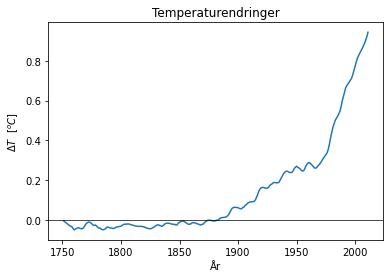

In [9]:
#/NoVolcanoes//////////////////////////////////////////////////////////////////////////////////////////////////////////
                                                                                                                    #//
# Forcing switches [n=1 off=0]                                                                                      #//
switch_ghg=1     # Greenhouse gas forcing on=1 off=0                                                                #//
switch_solar=1   # Solar forcing on=1 off=0                                                                         #//
switch_volc=0    # Volcanic forcing on=1 off=0                                                                      #//
switch_land=1    # Landuse forcing on=1 off=0                                                                       #//
switch_aero=1    # Pollution particle forcing on=1 off=0                                                            #//
                                                                                                                    #//
total_forcing = (switch_ghg*df['drivhusgasser']+switch_solar*df['solinnstråling']+switch_volc*df['vulkanisme']    
                +switch_land*df['arealbruk']+switch_aero*df['aerosoler'])                                           #//
                                                                                                                    #//
# parameters                                                                                                        #//
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       #//
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  #//
lambda_water=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   #//
lambda_cloud=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                        #//
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]                                #//
lambda_other=0.0       # Other feedbacks [Wm-2K-1]                                                                  #///
                                                                                                                    #//
lambda_sum=sum([lambda_planck,                                                                                      #//
    lambda_lapse,                                                                                                   #//
    lambda_water,                                                                                                   #//
    lambda_cloud,                                                                                                   #//
    lambda_albedo,                                                                                                  #//
    lambda_other])                                                                                                  #//
                                                                                                                    #//
# Deep ocean heat uptake efficency [Wm-2K-1]                                                                        #//
# CMIP3 values                                                                                                      #//
gamma=-0.69  # best guesses [-1 to -0.5]                                                                            #//
                                                                                                                    #//
# konverter dataframe til data-array                                                                                #//
radiative_forcing = total_forcing.to_numpy()                                                                        #//     
                                                                                                                    #//
# kaller opp funksjonen som regner ut temperaturendringene                                                          #//
df['NoVolcanoes'], To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)                              #//
                                                                                                                    #//
df['NoVolcanoes'].plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer")                                   #//
plt.axhline(y=0, linewidth=0.7, color="black")                                                                      #//
                                                                                                                    #//
# deleting variables that will be re-used. Not necessary but it can help to avoid mistakes                          #//
del switch_ghg, switch_solar, switch_volc, switch_land, switch_aero                                                 #//
del total_forcing                                                                                                   #//
del lambda_planck, lambda_lapse, lambda_water, lambda_cloud, lambda_albedo, lambda_other, lambda_sum, gamma         #//
                                                                                                                    #//
# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

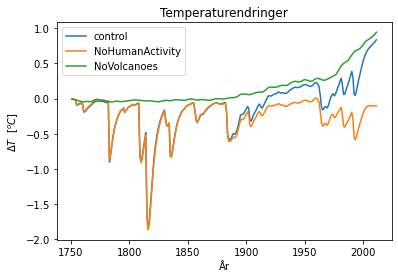

In [11]:
# Ploting the 3 experiments temperature change
df['control'].plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer")  
df['NoHumanActivity'].plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer") 
df['NoVolcanoes'].plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer")  
plt.legend()

### 3 - Analyzing the experiments:


* What is the difference in temperature trend between the different ? Which of the experiment is closest to the observed changes over the last 100 year?

* Which radiative forcing has been the main one before the pre-industrial time? Is there a change in which forcing that might be the dominant one in the future?

* What is the main effect of turning off the volcanoes? 